<a href="https://colab.research.google.com/github/raumyadip/machine_learning1/blob/main/Apple_Quality_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv("/content/apple_quality.csv")
df

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0        0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1        1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2        2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3        3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4        4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
...      ...       ...       ...        ...          ...        ...       ...   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   
4000     NaN       NaN       NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
0                          -0.491590483    good  
1                          -0.722809367    good  
2                           2.621636473     bad  
3                           0.790723217    good  
4                           0.501984036    good  
...                                 ...     ...  
3996                        1.854235285    good  
3997                       -1.334611391     bad  
3998                       -2.229719806    good  
3999                        1.599796456    good  
4000  Created_by_Nidula_Elgiriyewithana     NaN  

[4001 rows x 9 columns]

In [7]:
df.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [18]:
df1=df.dropna()

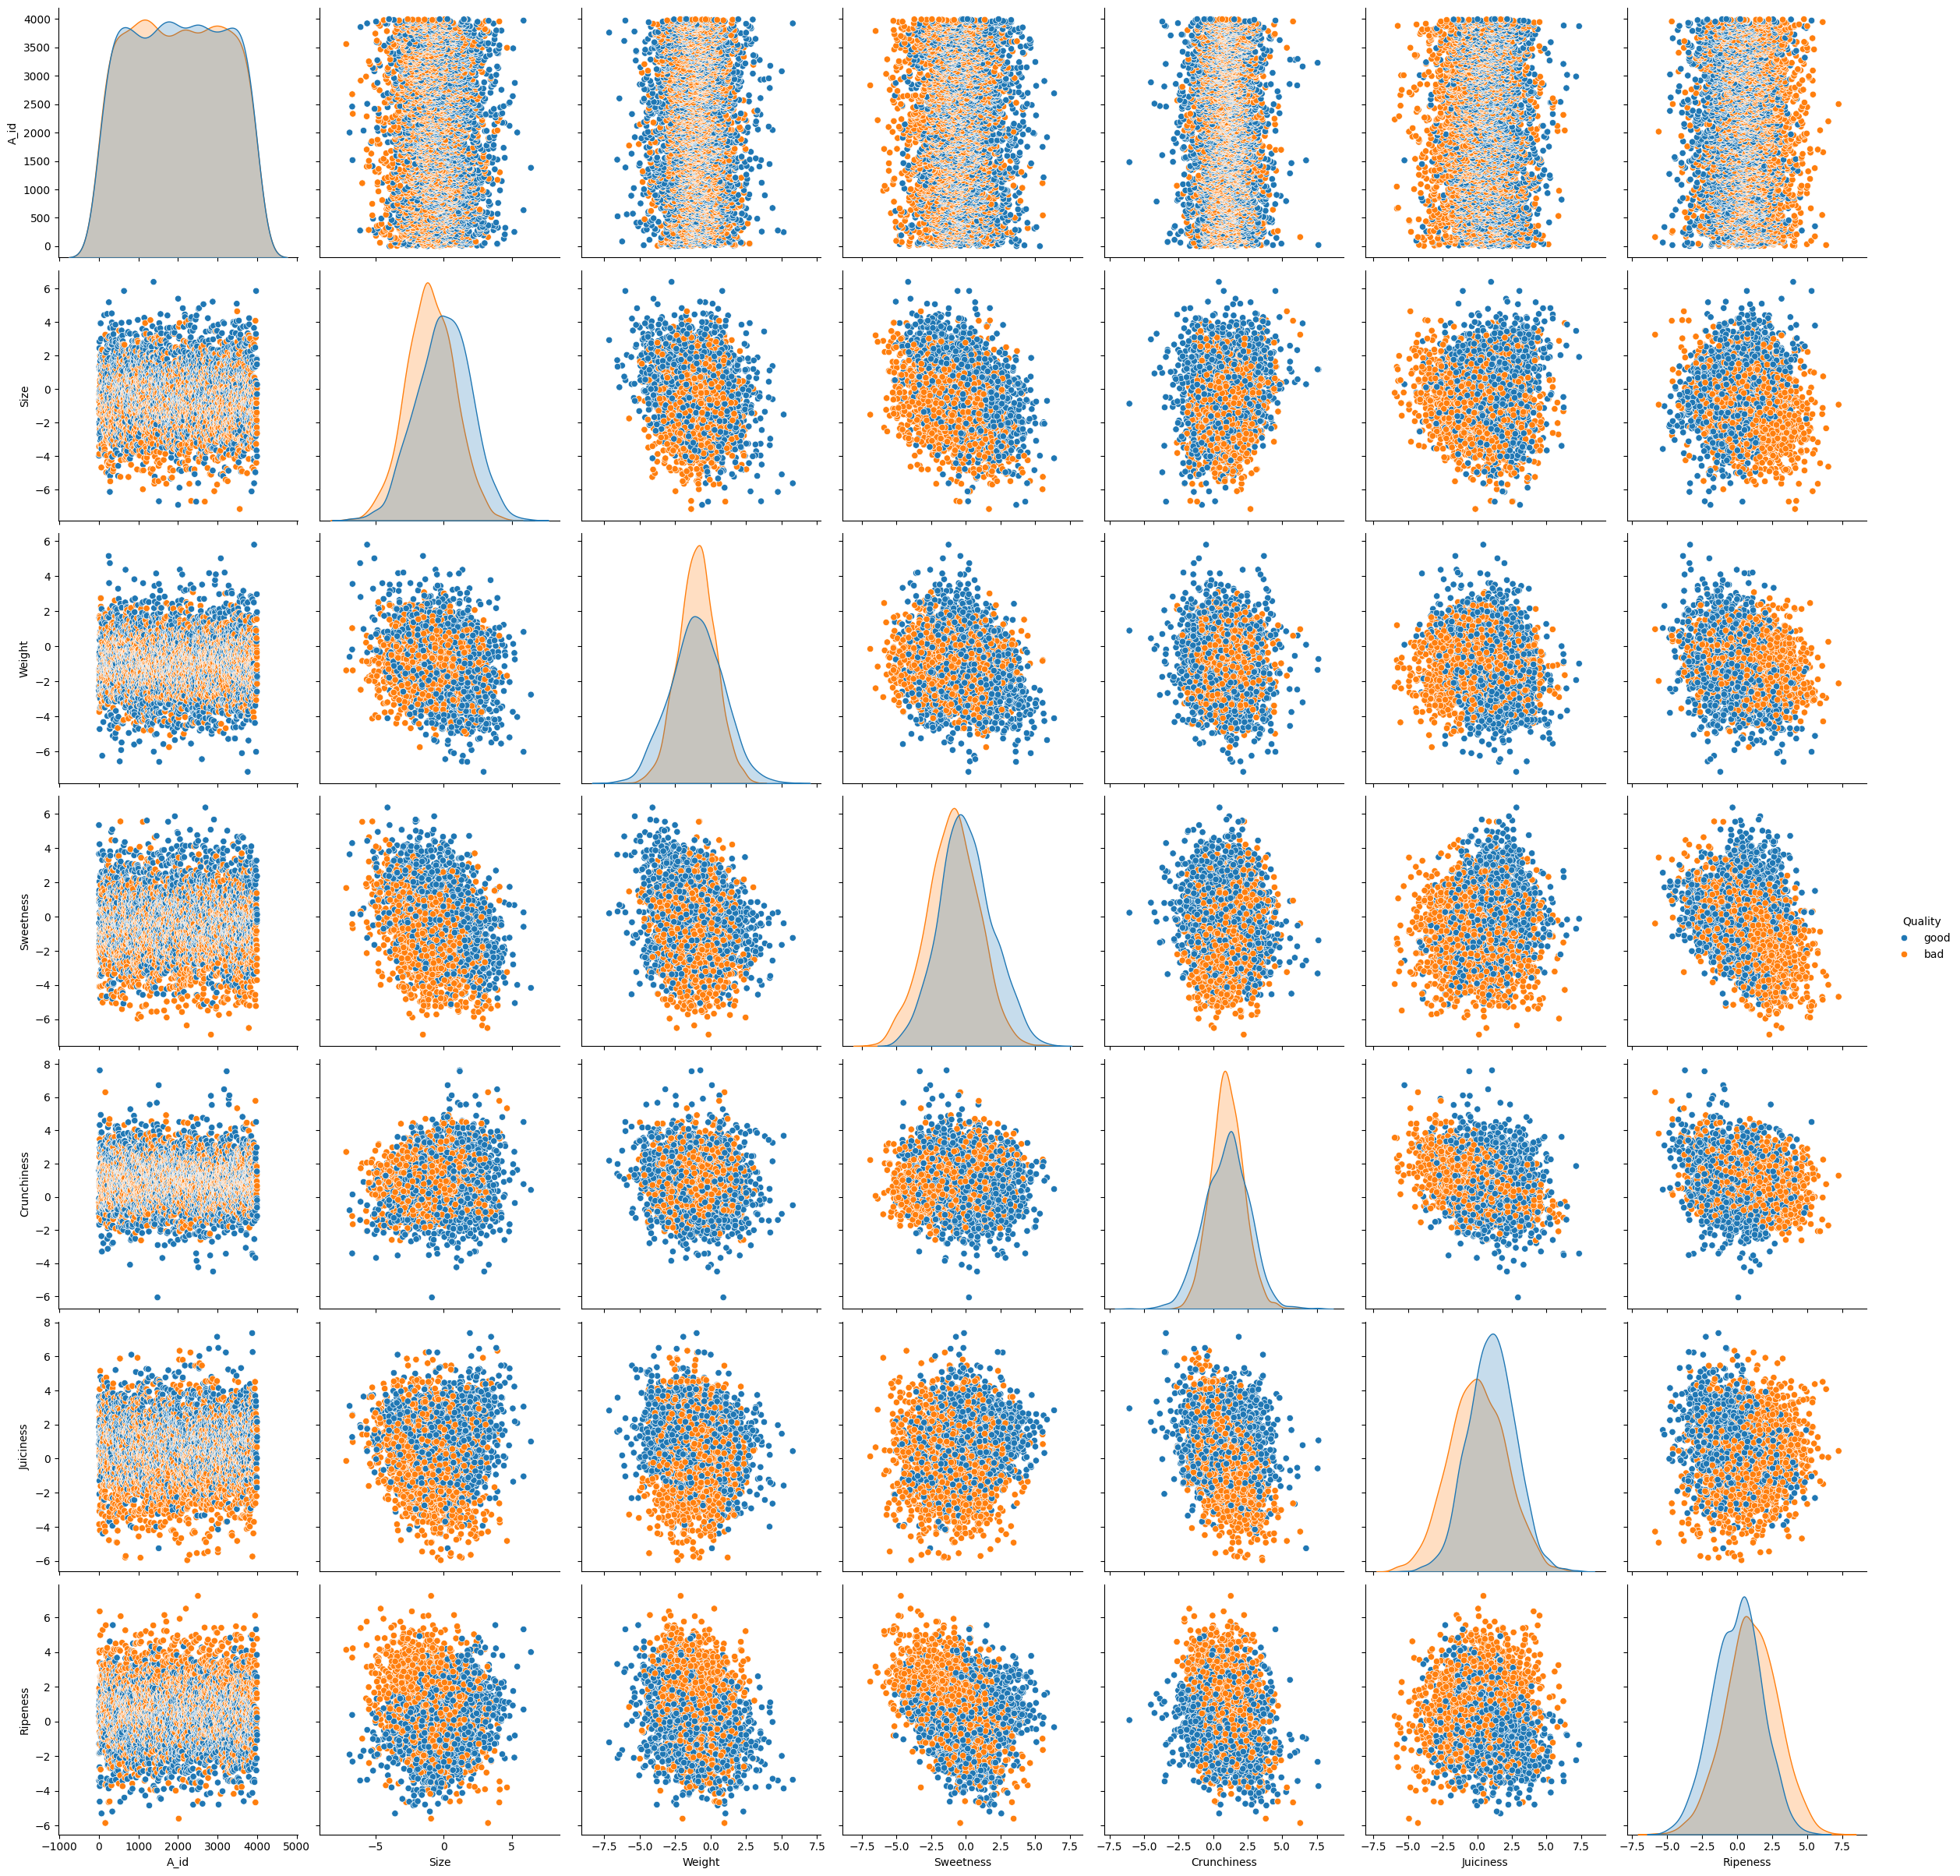

In [19]:
sns.pairplot(df1,hue="Quality",height=3.5)

In [20]:
X=df1[['Sweetness','Juiciness','Crunchiness','Ripeness','Acidity']]
y=df1['Quality']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.svm import SVC
model=SVC()
model.fit(X,y)

SVC()

In [28]:
y_pred=model.predict(X_test)
y_pred=pd.Series(y_pred)
y_pred=y_pred.sample(801)
y_pred

183    good
745    good
248     bad
231    good
252     bad
       ... 
462    good
18     good
713    good
221    good
203     bad
Length: 801, dtype: object

In [29]:
print(y_pred.shape)
print(y_test.shape)

(801,)
(801,)


In [32]:
from sklearn import metrics
acu= metrics.accuracy_score(y_test,y_pred)
con_m=metrics.confusion_matrix(y_test,y_pred)
classif_rep=metrics.classification_report(y_test,y_pred)

In [35]:
print(f'Accuracy_score={acu}')
print(f'Confusion metrix={con_m}')
print(f'classification report={classif_rep}')

Accuracy_score=0.48813982521847693
Confusion metrix=[[195 196]
 [214 196]]
classification report=              precision    recall  f1-score   support

         bad       0.48      0.50      0.49       391
        good       0.50      0.48      0.49       410

    accuracy                           0.49       801
   macro avg       0.49      0.49      0.49       801
weighted avg       0.49      0.49      0.49       801



In [50]:
new_data={
    'Sweetness':[0.45664],
    'Juiciness':[0.64127],
    'Crunchiness':[0.03456],
    'Ripeness':[0.17364],
    'Acidity':[0.43669]
}
df2=pd.DataFrame(new_data)
df2

Sweetness  Juiciness  Crunchiness  Ripeness  Acidity
0    0.45664    0.64127      0.03456   0.17364  0.43669

In [51]:
pred_new_data=model.predict(df2)
print(f'PREDICTION OF NEW DATA={pred_new_data}')

PREDICTION OF NEW DATA=['good']
